# Projet 4 : Réalisez une étude de santé publique avec R ou Python

## Presentation du contexte
Lors de ce projet nous incarnons un Data Analyst nouvellement recruté à la FAO (Food and Agriculture Organisation of the United Nations), une branche de l'ONU dont la mission principale est d'éradiquer la faim dans le monde.
### Objectif du projet
Nous cherchons ici à réaliser un notebook R Markdown ou Jupyter qui nous servira à analyser les données dont nous disposons sur la faim dans le monde. Notre objectif est de mettre en valeur les difficultés rencontrées par certains pays ainsi que l'utilisation des ressources à l'échelle mondiale afin de trouver des solutions pour combattre la faim dans le monde.


In [1]:
%matplotlib inline
#importe les librairies nécéssaires
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Préparation des donnnées
Cette première partie du script s'occupe de l'importation et de la préparation des données.  
Les noms de certaines colonnes ont été changées pour qu'elles soient plus représentatives des données qu'elles exposent ou pour uniformiser les noms entre les différentes tables pour faciliter les jointures.  
Les NaN ainsi que les "<0,1" dans les tables ont été remplacés par des 0.  
Dans la table sous-nutrition les periodes de 3 ans ont été remplacées par leur moyenne pour permettre la jointure avec les autres tables.  
Le type de certaines colonnes a été converti en entier ou en décimal pour permettre leur traitement.  
Plusieurs colonnes ont subi une remise à l'échelle pour harmoniser les données et permettre leur croisement.  
La dernière partie du code permet de vérifier la présence de données non-numériques ainsi que de vérifier le type données pour chaque table afin de s'assurer de la cohérence des données.  

In [2]:
#importe les données des fichiers csv dans des dataframes
aide_alimentaire = pd.read_csv("aide_alimentaire.csv", sep=",")
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv", sep=",")
population = pd.read_csv("population.csv", sep=",")
sous_nutrition = pd.read_csv("sous_nutrition.csv", sep=",")
cereales = pd.read_csv("FAOSTAT_data_9-14-2021.csv", sep=",")
#Changement de noms pour les colonnes Valeur pour des noms plus représentatifs
sous_nutrition = sous_nutrition.rename(columns={"Valeur":"Nb de personnes en sous-nutrition"})
aide_alimentaire = aide_alimentaire.rename(columns={"Valeur":"Aide alimentaire en kg"})
population = population.rename(columns={"Valeur":"Nombre d'habitants"})
#Changement de noms pour la colonne Pays bénéficiaire en Zone
aide_alimentaire = aide_alimentaire.rename(columns={"Pays bénéficiaire":"Zone"})
#Remplace les NaN par des 0 dans les tables sous_nutrition et dispo_alimentaire
sous_nutrition = sous_nutrition.fillna(value={"Nb de personnes en sous-nutrition": 0})
dispo_alimentaire = dispo_alimentaire.fillna(0)
#Remplace les '<0,1' par des 0 dans sous_nutrition
sous_nutrition.loc[sous_nutrition['Nb de personnes en sous-nutrition'] == '<0.1', 'Nb de personnes en sous-nutrition'] = 0
#Résume les périodes en années dans sous_nutrition pour les jointures de tables
sous_nutrition.loc[sous_nutrition['Année'] == '2012-2014', 'Année'] = 2013
sous_nutrition.loc[sous_nutrition['Année'] == '2013-2015', 'Année'] = 2014
sous_nutrition.loc[sous_nutrition['Année'] == '2014-2016', 'Année'] = 2015
sous_nutrition.loc[sous_nutrition['Année'] == '2015-2017', 'Année'] = 2016
sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018', 'Année'] = 2017
sous_nutrition.loc[sous_nutrition['Année'] == '2017-2019', 'Année'] = 2018
#Convertit la colonne "Nb de personnes en sous-nutrition" en décimal
sous_nutrition["Nb de personnes en sous-nutrition"] = pd.to_numeric(sous_nutrition["Nb de personnes en sous-nutrition"])
#Convertit la colonne "Année" en entier
sous_nutrition["Année"] = pd.to_numeric(sous_nutrition["Année"])
#Remise à l'échelle des valeur d'habitants
sous_nutrition['Nb de personnes en sous-nutrition'] *= 1000000
population["Nombre d'habitants"] *= 1000
#Conversion des tonnes en kgs
aide_alimentaire['Aide alimentaire en kg'] *= 1000
#Conversion des milliers de tonnes en kgs
dispo_alimentaire.loc[:, 'Disponibilité intérieure':'Variation de stock']*=1000000
dispo_alimentaire['Autres Utilisations']*=1000000
dispo_alimentaire['Aliments pour animaux']*=1000000
#On vérifie la présence de valeur non-numériques et de "<0.1" dans nos tables
if sous_nutrition['Nb de personnes en sous-nutrition'].isnull().values.any() == True:
    print("La table sous_nutrition contient" , sous_nutrition['Nb de personnes en sous-nutrition'].isnull().sum().sum() , "valeurs non-numériques." )
else:
    print("La table sous_nutrition ne contient aucune valeur non numérique.")

print("Nombre de lignes égales à '<0.1' dans sous_nutrition :", sum((sous_nutrition['Nb de personnes en sous-nutrition']=='<0.1')))

print()

if population["Nombre d'habitants"].isnull().values.any() == True:
    print("La table population contient" , population["Nombre d'habitants"].isnull().sum().sum() , "valeurs non-numériques." )
else:
    print("La table population ne contient aucune valeur non numérique.")

print("Nombre de lignes égales à '<0.1' dans population :", sum((population["Nombre d'habitants"]=='<0.1')))

print()

if aide_alimentaire['Aide alimentaire en kg'].isnull().values.any() == True:
    print("La table aide_alimentaire contient" , aide_alimentaire['Aide alimentaire en kg'].isnull().sum().sum() , "valeurs non-numériques." )
else:
    print("La table aide_alimentaire ne contient aucune valeur non numérique.")
    
print("Nombre de lignes égales à '<0.1' dans aide_alimentaire :", sum((aide_alimentaire['Aide alimentaire en kg']=='<0.1')))

print()

if dispo_alimentaire.isnull().values.any() == True:
    print("La table dispo_alimentaire contient" , dispo_alimentaire.isnull().sum().sum() , "valeurs non-numériques." )
else:
    print("La table dispo_alimentaire ne contient aucune valeur non numérique.")

if dispo_alimentaire.loc[:, 'Aliments pour animaux':'Variation de stock'].values.any()=='<0.1':
    print("La table dispo_alimentaire contient des lignes égales à '0.1' ")
else:
    print("La table dispo_alimentaire ne contient pas de '<0.1'.")
    
#Vérfie le type de données pour chaque colonne.
print()

print("sous_nutrition")
print(sous_nutrition.dtypes)
print()
print("population")
print(population.dtypes)
print()
print("aide_alimentaire")
print(aide_alimentaire.dtypes)
print()
print("dispo_alimentaire")
print(dispo_alimentaire.dtypes)

La table sous_nutrition ne contient aucune valeur non numérique.
Nombre de lignes égales à '<0.1' dans sous_nutrition : 0

La table population ne contient aucune valeur non numérique.
Nombre de lignes égales à '<0.1' dans population : 0

La table aide_alimentaire ne contient aucune valeur non numérique.
Nombre de lignes égales à '<0.1' dans aide_alimentaire : 0

La table dispo_alimentaire ne contient aucune valeur non numérique.
La table dispo_alimentaire ne contient pas de '<0.1'.

sous_nutrition
Zone                                  object
Année                                  int64
Nb de personnes en sous-nutrition    float64
dtype: object

population
Zone                   object
Année                   int64
Nombre d'habitants    float64
dtype: object

aide_alimentaire
Zone                      object
Année                      int64
Produit                   object
Aide alimentaire en kg     int64
dtype: object

dispo_alimentaire
Zone                                             

## Proportion de personnes en état de sous-nutrition en 2017

In [3]:
#Jointure des tables sous_nutrition et population
prop_sous_nutrition = pd.merge(sous_nutrition, population, how='right', on = ['Zone', 'Année'])
#Isolation des données de l'année 2017
prop_sous_nutrition = prop_sous_nutrition.loc[prop_sous_nutrition['Année'] == 2017]
#Agrégation des données de la table jointe par l'année
prop_sous_nutrition = prop_sous_nutrition.groupby(['Année']).sum()
#Création de la colonne qui affiche le % de personnes en sous-nutrition dans le monde
prop_sous_nutrition['Proportion de personnes en sous-nutrition en %'] = prop_sous_nutrition['Nb de personnes en sous-nutrition']/prop_sous_nutrition["Nombre d'habitants"]*100
#Arrondi les valeurs
prop_sous_nutrition['Proportion de personnes en sous-nutrition en %'] = prop_sous_nutrition['Proportion de personnes en sous-nutrition en %'].round(2)
prop_sous_nutrition

,Nb de personnes en sous-nutrition,Nombre d'habitants,Proportion de personnes en sous-nutrition en %
Année,,,
2017,535700000.0,7.548134e+09,7.1


## Nombre théorique de personnes qui pourraient être nourries

In [4]:
besoins = (2400+2700+2000+2200)/4
#Créé une nouvelle table contenant les données de population de l'année 2017
population_2017 = population.loc[population['Année'] == 2017]
#Créé une nouvelle table qui résulte de l'assiociation de dispo_alimentaire et population_2017
dispo_ali_2017 = pd.merge(dispo_alimentaire, population_2017, on= "Zone")
#Créé une nouvelle colonne donnant les Kcal/jour dont dispose un pays
dispo_ali_2017["Kcal/jour"] = dispo_ali_2017["Disponibilité alimentaire (Kcal/personne/jour)"] * dispo_ali_2017["Nombre d'habitants"]
#Fait la somme des Kcal/jour disponible dans le monde
dispo_ali_2017 = dispo_ali_2017["Kcal/jour"].sum()
#Divise les Kcal/jour disponible dans le monde par le nombre de Kcal par jour nécéssaire pour une personne en moyenne.
dispo_ali_2017 = dispo_ali_2017/besoins
#Converti le nombre de théorique personne qu'on peut nourrir en entier
dispo_ali_2017_int = dispo_ali_2017.astype('int64')
#Affiche le nombre théorique personne qu'on peut nourrir
print("En 2017 on aurait pu nourrir", dispo_ali_2017_int, "personnes.")

#Créé une nouvelle table contenant les données de dispo_alimentaire pour les produits d'origine végétale
dispo_alimentaire_veg = dispo_alimentaire.loc[dispo_alimentaire['Origine'] == "vegetale"]
#Créé une nouvelle table qui résulte de l'assiociation de dispo_alimentaire_veg et population_2017
dispo_ali_2017_veg = pd.merge(dispo_alimentaire_veg, population_2017, on= "Zone")
#Créé une nouvelle colonne donnant les Kcal/jour dont dispose un pays 
dispo_ali_2017_veg["Kcal/jour"] = dispo_ali_2017_veg["Disponibilité alimentaire (Kcal/personne/jour)"] * dispo_ali_2017_veg["Nombre d'habitants"]
#Fait la somme des Kcal/jour disponible dans le monde
dispo_ali_2017_veg = dispo_ali_2017_veg["Kcal/jour"].sum()
#Divise les Kcal/jour disponible dans le monde par le nombre de Kcal par jour nécéssaire pour une personne en moyenne.
dispo_ali_2017_veg = dispo_ali_2017_veg/besoins
#Converti le nombre de théorique personne qu'on peut nourrir en entier
dispo_ali_2017_veg_int = dispo_ali_2017_veg.astype('int64')
#Affiche le nombre théorique personne qu'on peut nourrir
print("En 2017 on aurait pu nourrir", dispo_ali_2017_veg_int, "personnes uniquement avec des aliments d'origine végétale.")

En 2017 on aurait pu nourrir 8997412742 personnes.
En 2017 on aurait pu nourrir 7423984607 personnes uniquement avec des aliments d'origine végétale.


## Utilisation de la disponibilité intérieure en 2017

(0.0, 100.0)

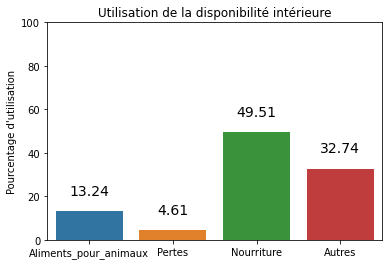

In [5]:
#Disponibilité intérieure = Importations + Production - Exportations + Variation de stock
#Disponibilité intérieure = Nourriture + Pertes + Semences + Traitement + Autres Utilisations + Aliments pour animaux

#Calcule des proportion de la disponibilité intérieure pour chaque catégorie
disp_an = dispo_alimentaire["Aliments pour animaux"].sum()/dispo_alimentaire["Disponibilité intérieure"].sum()*100
disp_pr = dispo_alimentaire["Pertes"].sum()/dispo_alimentaire["Disponibilité intérieure"].sum()*100
disp_nr = dispo_alimentaire["Nourriture"].sum()/dispo_alimentaire["Disponibilité intérieure"].sum()*100
disp_tr = dispo_alimentaire["Traitement"].sum()/dispo_alimentaire["Disponibilité intérieure"].sum()*100
disp_sm = dispo_alimentaire["Semences"].sum()/dispo_alimentaire["Disponibilité intérieure"].sum()*100
disp_au = dispo_alimentaire["Autres Utilisations"].sum()/dispo_alimentaire["Disponibilité intérieure"].sum()*100
#Additionne les catégories qui ne nous intéresse pas pour avoir la part du reste
disp_aut = disp_au + disp_sm + disp_tr

#Enregistre les valeurs précédentes dans des listes pour le graphique
x_axis = ["Aliments_pour_animaux", "Pertes", "Nourriture", "Autres"]
y_axis = [disp_an, disp_pr, disp_nr, disp_aut]

#Création du graphique
plt.ylabel("Pourcentage d'utilisation")
plt.title('Utilisation de la disponibilité intérieure')

g=sb.barplot(x = x_axis, y = y_axis)

#Affiche les valeurs sur le graphique
for p in g.patches:
    g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                textcoords='offset points')
#Règle la taille du graphique
g.set_ylim(0,100)

## Proportion de personnes sous-alimentées par pays en 2017
### A l'intérieur du pays

In [6]:
#Association des tables sous_nutrition et population
pop_sous_nutrition = pd.merge(sous_nutrition, population, on = ['Zone', 'Année'])
#Isolation des données correspondant à l'année 2017
pop_sous_nutrition = pop_sous_nutrition.loc[pop_sous_nutrition['Année'] == 2017]
#Calcule le % de personnes en sous-nutrition
pop_sous_nutrition["% en sous-nutrition"] = pop_sous_nutrition["Nb de personnes en sous-nutrition"]/pop_sous_nutrition["Nombre d'habitants"]*100
#Range les valeurs du plus grand au plus petit
pop_sous_nutrition = pop_sous_nutrition.sort_values(by=["% en sous-nutrition"], ascending=False)
#Affiche les 10 premières valeurs
pop_sous_nutrition.head(10)

,Zone,Année,Nb de personnes en sous-nutrition,Nombre d'habitants,% en sous-nutrition
472,Haïti,2017,5300000.0,10982366.0,48.259182
946,République populaire démocratique de Corée,2017,12000000.0,25429825.0,47.188685
652,Madagascar,2017,10500000.0,25570512.0,41.062924
622,Libéria,2017,1800000.0,4702226.0,38.279742
604,Lesotho,2017,800000.0,2091534.0,38.249438
1102,Tchad,2017,5700000.0,15016753.0,37.957606
970,Rwanda,2017,4200000.0,11980961.0,35.055619
730,Mozambique,2017,9400000.0,28649018.0,32.810898
1120,Timor-Leste,2017,400000.0,1243258.0,32.173531
4,Afghanistan,2017,10500000.0,36296113.0,28.928718


### Dans le monde

In [7]:
#Association des tables sous_nutrition et population
pop_sous_nutrition_m = pd.merge(sous_nutrition, population, on = ['Zone', 'Année'])
#Isolation des données correspondant à l'année 2017
pop_sous_nutrition_m = pop_sous_nutrition_m.loc[pop_sous_nutrition_m['Année'] == 2017]
#Ajoute la population totale du monde
pop_sous_nutrition_m["total population"] = pop_sous_nutrition_m["Nombre d'habitants"].sum()
#Calcule le % de personnes en sous-nutrition
pop_sous_nutrition_m["% en sous-nutrition monde"] = pop_sous_nutrition_m["Nb de personnes en sous-nutrition"]/pop_sous_nutrition_m["total population"]*100
#Range les valeurs du plus grand au plus petit
pop_sous_nutrition_m = pop_sous_nutrition_m.sort_values(by=["% en sous-nutrition monde"], ascending=False)
#Affiche les 10 premières valeurs
pop_sous_nutrition_m.head(10)

,Zone,Année,Nb de personnes en sous-nutrition,Nombre d'habitants,total population,% en sous-nutrition monde
508,Inde,2017,190100000.0,1.338677e+09,7.543799e+09,2.519951
820,Pakistan,2017,24800000.0,2.079062e+08,7.543799e+09,0.328747
514,Indonésie,2017,23600000.0,2.646510e+08,7.543799e+09,0.312840
772,Nigéria,2017,22800000.0,1.908732e+08,7.543799e+09,0.302235
100,Bangladesh,2017,21500000.0,1.596854e+08,7.543799e+09,0.285002
370,Éthiopie,2017,21100000.0,1.063999e+08,7.543799e+09,0.279700
868,Philippines,2017,15700000.0,1.051729e+08,7.543799e+09,0.208118
952,République-Unie de Tanzanie,2017,13400000.0,5.466034e+07,7.543799e+09,0.177629
946,République populaire démocratique de Corée,2017,12000000.0,2.542982e+07,7.543799e+09,0.159071
580,Kenya,2017,11900000.0,5.022114e+07,7.543799e+09,0.157745


## Pays qui ont le plus bénéficié d’aide depuis 2013

In [8]:
#Calcule la moyenne de l'aide alimentaire reçue par pays entre 2013 et 2018
aide_alimentaire_mean = aide_alimentaire.groupby(["Zone"]).mean()
#Range les valeurs d'aide alimentaire par ordre descendant
aide_alimentaire_mean = aide_alimentaire_mean.sort_values(by=['Aide alimentaire en kg'], ascending=False)
#Drop la colonne Année pour la lisibilité
aide_alimentaire_mean = aide_alimentaire_mean.drop(columns=['Année'])
#Arrondie les valeurs pour la lisibilité
aide_alimentaire_mean['Aide alimentaire en kg'] = aide_alimentaire_mean['Aide alimentaire en kg'].round(2)
#Affiche les 10 pays ayant reçus le plus d'aide alimentaire depuis 2013
aide_alimentaire_mean.head(10)

,Aide alimentaire en kg
Zone,
République arabe syrienne,48919552.63
Éthiopie,41857393.94
Yémen,31749578.95
Soudan du Sud,31602181.82
Soudan,27907666.67
Kenya,20475407.41
Bangladesh,13927520.00
Pakistan,12161684.21
Afghanistan,11590750.00


## Disponibilité par habitant

In [9]:
#Fais la somme des données de dispo_alimentaire par pays
disp_al_sum = dispo_alimentaire.groupby(['Zone']).sum()
#Jointure entre les tables disp_al_sum et population_2017
disp_al_sum = pd.merge(disp_al_sum, population_2017, on= "Zone")
#Création de la colonne Disponibilité par habitants
disp_al_sum["Disponibilité par habitants"] = disp_al_sum["Disponibilité intérieure"]/disp_al_sum["Nombre d'habitants"]
#Drop les colonnes inutiles pour la lisibilité
disp_al_sum.drop(disp_al_sum.iloc[:, 1:18], inplace = True, axis = 1)
#Arrondi les valeurs pour la lisibilité
disp_al_sum = disp_al_sum.round(2)
#Range les valeurs du plus grand au plus petit et affiche le top 10
disp_al_sum = disp_al_sum.sort_values(by=["Disponibilité par habitants"], ascending=False)
print(disp_al_sum.head(10))
#Range les valeurs du plus petit au plus grand et affiche le top 10
disp_al_sum = disp_al_sum.sort_values(by=["Disponibilité par habitants"], ascending=True)
print(disp_al_sum.head(10))

         Zone  Disponibilité par habitants
50   Eswatini                      5749.44
23     Brésil                      4971.83
63     Guyana                      4243.95
17     Belize                      4103.58
98    Maurice                      3769.87
44   Danemark                      3445.23
26    Bélarus                      2912.31
51      Fidji                      2848.00
10  Australie                      2724.96
88   Lituanie                      2624.22
              Zone  Disponibilité par habitants
163          Yémen                       351.43
150          Tchad                       353.21
152    Timor-Leste                       359.54
0      Afghanistan                       372.35
170       Éthiopie                       413.67
56          Gambie                       424.59
87         Libéria                       425.76
62   Guinée-Bissau                       429.94
14      Bangladesh                       455.63
84         Lesotho                       461.86

## Utilisation des céréales

(0.0, 100.0)

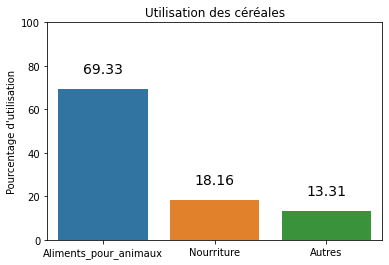

In [10]:
#Isole les données de la colonne Produit pour les céréales pour avoir la liste des céréales
cereales_2 = cereales["Produit"]
#Suppression des doublons
cereales_2.drop_duplicates()
#Fusion des tables dispo_alimentaire et cereales_2 pour garder uniquement les données sur les céréales
use_cereales = pd.merge(dispo_alimentaire, cereales_2, how='inner', on = "Produit")

#Calcule des proportion de la disponibilité intérieure pour chaque catégorie
disp_anc = use_cereales["Aliments pour animaux"].sum()/use_cereales["Disponibilité intérieure"].sum()*100
disp_prc = use_cereales["Pertes"].sum()/use_cereales["Disponibilité intérieure"].sum()*100
disp_nrc = use_cereales["Nourriture"].sum()/use_cereales["Disponibilité intérieure"].sum()*100
disp_trc = use_cereales["Traitement"].sum()/use_cereales["Disponibilité intérieure"].sum()*100
disp_smc = use_cereales["Semences"].sum()/use_cereales["Disponibilité intérieure"].sum()*100
disp_auc = use_cereales["Autres Utilisations"].sum()/use_cereales["Disponibilité intérieure"].sum()*100
#Additionne les catégories qui ne nous intéresse pas pour avoir la part du reste
disp_autc = disp_auc + disp_smc + disp_trc + disp_prc

#Enregistre les valeurs précédentes dans des listes pour le graphique
x_axis = ["Aliments_pour_animaux", "Nourriture", "Autres"]
y_axis = [disp_anc, disp_nrc, disp_autc]

#Création du graphique
plt.ylabel("Pourcentage d'utilisation")
plt.title('Utilisation des céréales')

gc=sb.barplot(x = x_axis, y = y_axis)

#Affiche les valeurs sur le graphique
for p in gc.patches:
    gc.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                textcoords='offset points')
#Règle la taille du graphique
gc.set_ylim(0,100)

# Utilisation du manioc par la Thaïlande

In [11]:
#Isole les données de dispo_alimentaire sur le Manioc
dispo_manioc = dispo_alimentaire.loc[dispo_alimentaire['Produit'] == "Manioc"]
#Filtre les données une nouvelle fois pour la Thaïlande
dispo_manioc = dispo_manioc.loc[dispo_manioc['Zone'] == "Thaïlande"]
#Jointure entre les tables dispo_manioc et pop_sous_nutrition
dispo_manioc = pd.merge(dispo_manioc, pop_sous_nutrition, on= "Zone")
#Drop les colonnes inutiles
dispo_manioc.drop(dispo_manioc.iloc[:, 2:9], inplace = True, axis = 1)
#Drop les colonnes inutiles
dispo_manioc.drop(columns=["Nourriture", "Pertes", "Semences", "Traitement"])
#Calcule l'exportation sur la production
dispo_manioc["Exportation/Production"] = dispo_manioc["Exportations - Quantité"]/dispo_manioc["Production"]*100
#Enregistre les données d'exportation/production dans une variable et arrondie la valeur
expor_sur_prod = dispo_manioc["Exportation/Production"].iloc[0].round(2)
#Enregistre les données de proportion de personnes en sous nutrition en Thaïlande dans une variable et arrondie la valeur
thai_s_nutri = dispo_manioc["% en sous-nutrition"].iloc[0].round(2)
#Affiche les valeurs
print("En Thaïlande",expor_sur_prod, "% de la production de manioc est exportée.")
print("En Thaïlande la proportion de personnes en sous-nutrition est de", thai_s_nutri, "%.")

En Thaïlande 83.41 % de la production de manioc est exportée.
En Thaïlande la proportion de personnes en sous-nutrition est de 8.96 %.
